<a href="https://colab.research.google.com/github/cumulus01/study/blob/main/%EC%8A%A4%ED%84%B0%EB%94%94211001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#3.1 Hello World 프로그램
print("Hello,World!")

Hello,World!


In [67]:
print('Hello,World')

Hello,World


In [68]:
try:
#%tensorflow_version 명령은 오직 google colab에서만 사용가능. %:매직커맨드 
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [69]:
print(tf.__version__)  
## 언더바 앞뒤로 두개씩!!

2.6.0


In [70]:
import tensorflow as tf
print(tensorflow.__version__)  
## 언더바 앞뒤로 두개씩!!

NameError: ignored

In [71]:
# OR ,AND, XOR 연산가능한 신경망 네트워크 구현하기

In [72]:
#난수 생성 with uniform 0과 1사이 
rand=tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.5774008], shape=(1,), dtype=float32)


In [73]:
 rand=tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.36358023 0.51039386 0.43396842 0.88316333], shape=(4,), dtype=float32)


In [74]:
#난수 생성 with normal 평균이 0 표준편차가 1
rand=tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.83776987 -1.3438904  -0.01969967 -1.3246092 ], shape=(4,), dtype=float32)


In [75]:
#뉴런 만들기 
#뉴런은 신경망의 기본 구성요소로
# 퍼셉트론으로도 불림.
#뉴런이 여러개 모여 레이어를 형성
#뉴런 구성요소: 입력값,활성화함수,가중치,출력
#입력에 가중치 곱하고 활성화함수를 거쳐서 출력을 얻음. 
#입력값,가중치,출력 정수or 실수 주로 사용
#활성화함수: 출력값을 정하는 함수로, sigmoid나 ReLU 주로 사용
#Sigmoid는 S자 곡선이라는 뜻으로 ReLU 는 Rectified Linear Unit 정제된 선형 함수. 은닉층을 여러개 사용시작하면서 sigmoid 에서 ReLU가 더 많이 사용된다.: 역전파시 밯생하는 vanishing gradient문제.
#뉴런이 학습할 때 변화하는 것은  "가중치" : 초기에는 랜덤한 값을 넣고 학습과정을 통해 점차 일정한 값을 수렴함. 

In [76]:
#시그모이드 함수 구현
#math 상수 e x승 하는데 필요. 
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [77]:
#뉴런 정의
#입력:1 출력:0
x=1
y=0
w=tf.random.normal([1],0,1)
output=sigmoid(x*w)
print(output)

0.361034111465137


In [78]:
#에러:-0.7100905565

In [79]:
#뉴런은 결국 w값으로 w를 적절하게 변화시키는게 관건 
#경사하강법 사용: w에 입력값* 학습률* 에러를 더하는 것.
#학습률은 너무크면 학습속도는 빠르지만 과도한 학습으로 적정수치를 벗어날 우려가 있고
#너무 작은 값으로 설정하면 학습속도가 느려질 우려가 있음.

In [80]:
#range범위 0부터 999까지
for i in range(1000):
  output=sigmoid(x+w)
  error=y-output
  w=w+x*0.1*error

  if i%100==99:
    print(i,error,output)


99 -0.1097193971881524 0.1097193971881524
199 -0.054385657276534285 0.054385657276534285
299 -0.03575360158765095 0.03575360158765095
399 -0.026541610276291257 0.026541610276291257
499 -0.02107394874362593 0.02107394874362593
599 -0.017461257912938823 0.017461257912938823
699 -0.014899496293966911 0.014899496293966911
799 -0.012989672617307036 0.012989672617307036
899 -0.011511740545710298 0.011511740545710298
999 -0.010334397958516811 0.010334397958516811


In [81]:
#뉴런 정의
#입력:0 출력:1
x=0
y=1
w=tf.random.normal([1],0,1)

for i in range(1000):
  output=sigmoid(x+w)
  error=y-output
  w=w+x*0.1*error

  if i%100==99:
    print(i,error,output)

99 0.5867230224448476 0.41327697755515236
199 0.5867230224448476 0.41327697755515236
299 0.5867230224448476 0.41327697755515236
399 0.5867230224448476 0.41327697755515236
499 0.5867230224448476 0.41327697755515236
599 0.5867230224448476 0.41327697755515236
699 0.5867230224448476 0.41327697755515236
799 0.5867230224448476 0.41327697755515236
899 0.5867230224448476 0.41327697755515236
999 0.5867230224448476 0.41327697755515236


In [82]:
#값이 변하지않음 경사하강법에서 입력값을 곱한 값을 더해주기 때문에 입력값이 0이여서 update가 되지않는다. ->bias추가(항상 입력에 일정한 수 더해줌)
#최종 입력되는 값의 식 X*W+b

In [83]:
x=0
y=1
w=tf.random.normal([1],0,1)
b=tf.random.normal([1],0,1)

for i in range(1000):
  output=sigmoid(x*w+1*b)
  error=y-output
  w=w+x*0.1*error
  b=b+1*0.1*error

  if i%100==99:
    print(i,error,output)

99 0.06906281779828072 0.9309371822017193
199 0.041715789294319294 0.9582842107056807
299 0.02972870427990071 0.9702712957200993
399 0.023047391715923737 0.9769526082840763
499 0.018800138262964117 0.9811998617370359
599 0.015866239943597482 0.9841337600564025
699 0.013719944883857194 0.9862800551161428
799 0.01208251765811097 0.987917482341889
899 0.01079265369520499 0.989207346304795
999 0.009750555203756783 0.9902494447962432


In [84]:
# 1st 신경망 네트워크:AND

In [85]:
# AND 연산: 입력 모두 참이때만 true,  o.w false  -> True False는 문자열이 아니기 때문에 따옴표 X -> 정수로 표현 가능. True=1 False=0 

In [86]:
print(int(True))
print(int(False))

1
0


In [87]:
# AND 구현 
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.1046159834477582
399 -0.0636514569484094
599 -0.04561615863652788
799 -0.03544596667188003
999 -0.028932180302346396
1199 -0.024413354309712997
1399 -0.021100265240180428
1599 -0.018569332603655363
1799 -0.01657455471102347
1999 -0.014962390741670112


In [88]:
#numpy의 array를 사용하는 이유:
# array가 아닌 list 사용시 정수를 곱할때: 양수는 리스트의 원소 반복 횟수로 적용 & 0이하이면 빈 리스트 반환..
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [89]:
# array가 아닌 list 사용시 실수를 곱할때 : error
print([1,2,3]*0.01)

TypeError: ignored

In [90]:
# array 사용할 때 : 각 원소별로 곱하는 연산이 정상적으로 수행된다. 출력값에 쉼표가 없는데 np의 array는 쉼표 표시하지 않는다. 
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [91]:
# 정상적으로 작동하는지 평가: 기대출력값과 실제 출력값 비교.(마지막 출력갑에서 e-05 는 가수로 0.00002486.... 의미) 
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9650699916810941
X: [1 0] Y: [0] Output: 0.02475415966199099
X: [0 1] Y: [0] Output: 0.02482938345024394
X: [0 0] Y: [0] Output: 2.3391029444037337e-05


In [92]:
print('w:', w)
print('b:', b)

w: tf.Tensor([6.9894385 6.99255  ], shape=(2,), dtype=float32)
b: tf.Tensor([-10.663135], shape=(1,), dtype=float32)


In [93]:
# 2nd 신경망 네트워크:OR
# 입력값중 하나만 참이여도 True o.w False
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.051775731695371474
399 -0.026511658874456973
599 -0.017689999216052216
799 -0.013224055842755086
999 -0.010538577608894477
1199 -0.008750272265636933
1399 -0.007476043871491575
1599 -0.00652275442267107
1799 -0.005783665865937402
1999 -0.005192726595420999


In [94]:
# 정상적으로 작동하는지 평가: 기대출력값과 실제 출력값 비교. 
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.999997134481138
X: [1 0] Y: [1] Output: 0.9897031839150122
X: [0 1] Y: [1] Output: 0.9896840496678917
X: [0 0] Y: [0] Output: 0.02574346357361782


In [95]:
# range 2000->4000 증가 후 결과 비교 
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(4000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.051548160869642284
399 -0.026257179978122214
599 -0.01755742998639591
799 -0.013146346323591906
999 -0.010488019064224204
1199 -0.008715083049434101
1399 -0.007450145485296399
1599 -0.006502801496058135
1799 -0.005767962554503733
1999 -0.00518005297533523
2199 -0.004700924973963336
2399 -0.0043027783386091895
2599 -0.003966472763615506
2799 -0.0036779109452448125
2999 -0.003428408438443588
3199 -0.0032106505823902773
3399 -0.0030188294234263086
3599 -0.0028485062035617514
3799 -0.0026963677045571174
3999 -0.002559597330982202


In [96]:
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999996605390056
X: [1 0] Y: [1] Output: 0.99490286167063
X: [0 1] Y: [1] Output: 0.9948943234495784
X: [0 0] Y: [0] Output: 0.012746664380275167


In [97]:
# 3rd 신경망 네트워크:XOR
# 입력값중 홀수 개만 참이여야 True o.w False
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.0015177863850356355
399 -6.170446366915439e-05
599 -2.5082637267193064e-06
799 -1.2843805252682472e-07
999 3.722842145670313e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [98]:
# 정상적으로 작동하는지 평가: 기대출력값과 실제 출력값 비교: 결과 안좋음. 
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


In [99]:
#w, b 값 확인
print('w:', w)
print('b:', b)

w: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
b: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


In [100]:
# 결과가 좋았던 AND연산의 w,b값과 XOR의 w,b값 비교.

AND

w: tf.Tensor([6.9894385 6.99255  ], shape=(2,), dtype=float32)

b: tf.Tensor([-10.663135], shape=(1,), dtype=float32)

XOR

w: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)

b: tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)

AND의 가중치값은 둘다 비슷하기 때문에 서로 비슷한 중요도 가진다는 것을 알 수 있음 그리고 편향값은 큰 음수로 두 가중치를 모두 합쳐야지만 음의 편향을 이겨냄.
반면에 XOR은 어떤일을 하려는지 명확하지 않음. 이러한 XOR 문제 때문에 인공지는의 첫번째 겨울이 찾아옴.

이를 해결하기 위해서는 여러개의 퍼셉트론을 사용해야함.

In [101]:
# 여러 개의 퍼셉트론을 이용한 XOR 계산 (여기서는 2개의 layer 사용)
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [102]:
# 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2809
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2766
Epoch 3/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2737
Epoch 4/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2717
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2706
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2693
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 8/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2682
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 11/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2676
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2674
Epoch 13/2000
4/4 [==============================

In [103]:
# 학습된 네트워크 평가: 결과 월등히 향상됨.  
model.predict(x)

array([[0.04203513],
       [0.9595    ],
       [0.95889413],
       [0.04739133]], dtype=float32)

In [104]:
# 모델의 가중치와 편향 
#kernel: 가중치 bias:편향 
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.269856 ,  5.345596 ],
       [ 5.057345 , -5.5019374]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-2.8520744, -3.0288036], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[7.682345 ],
       [7.6180115]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-3.771528], dtype=float32)>


In [ ]:
# 하나의 퍼셉트론을 사용했을때는 가중치나 편향의 역할을 파악하기 쉬웠다면 여러 퍼셉트론을 사용하면서 파악하기 힘들어짐.

딥러닝 네트워크 학습이 잘되고 있는지 파악하기 위해서는 좋은 시각화 도구 필요:Matplotlib.pyplot 사용하기.

In [109]:
import matplotlib.pyplot as plt
x = range(20) # 0-19 정수
y = tf.random.normal([20],0,1) #난수 생성

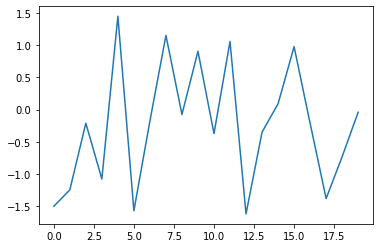

In [110]:
# (기본값)꺾은선 그래프
plt.plot(x,y)
plt.show() #plt 출력 방법 

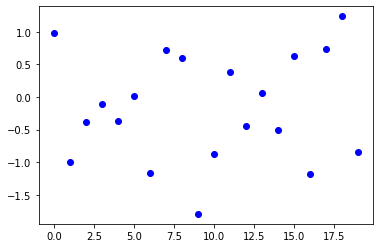

In [108]:
# 점 그래프
plt.plot(x,y,'bo') #b:blue (r:빨강,y:노랑,g:초록,k:검정) #o:점 (-:선,--:점선) 
plt.show()

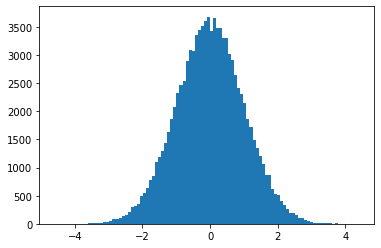

In [111]:
#히스토그램
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100) #bin 나누는 영역 개수  
plt.show()

In [113]:
# 딥러닝에서 가장 많이 볼 그래프는 학습이 잘 진행되고 있는지 보기 위해 측정치 변화량을 나타내는 선 그래프 이다.

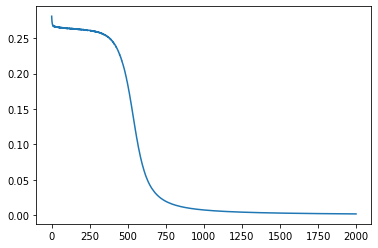

In [114]:
#XOR에서의 손실함수 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])